In [ ]:
# Work flow of the LLM/LangGraph
# Author: Muhammad Humayun Khan

from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [22]:
# load the key and the model
load_dotenv()
model = ChatOpenAI()

In [ ]:
# Create the State which is actually a class having question and its answer
class Question_Answer(TypedDict):
    question:str
    answer:str

In [24]:
graph = StateGraph(Question_Answer)

In [25]:
# function to be called for the question_answer_node
def question_answer_func(state:Question_Answer) -> Question_Answer:
    question = state['question']       # extrat the question from the state
    prompt = f'Provide answer to the question {question}'
    response_llm = model.invoke(prompt).content

    state['answer'] = response_llm

    return state

In [26]:
# add nodes to the graph
graph.add_node('question_answer_node',question_answer_func)

In [27]:
# add edges to the graph
graph.add_edge(START,'question_answer_node')
graph.add_edge('question_answer_node',END)

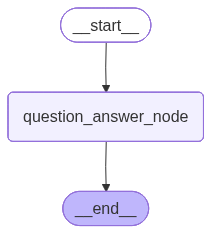

In [28]:
# compile the graph
graph.compile()

In [29]:
result = graph.compile()

In [30]:
initial_question_input = {'question':'What am I doing?'}
response = result.invoke(initial_question_input)
print(response)

{'question': 'What am I doing?', 'answer': 'You are currently interacting with me, a chatbot, and asking me questions.'}
